In [1]:
from random import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_json("../../train.json")

In [3]:
x_band1 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_1"]])
x_band2 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_2"]])
X_train = np.concatenate([x_band1[:, :, :, np.newaxis]
                          , x_band2[:, :, :, np.newaxis]
                         , ((x_band1+x_band1)/2)[:, :, :, np.newaxis]], axis=-1)
x_band1.shape

(1604, 75, 75)

In [7]:
import sys
sys.path.insert(0, '../Filters')

import median

In [8]:
orgimg = x_band1[0]

In [9]:
newimg = median.median_filter(orgimg)

In [10]:
from scipy.stats import expon
r = expon.rvs(size=1000)

In [11]:
r

array([  4.87465863e-01,   1.30106147e+00,   2.30090631e+00,
         1.50046540e+00,   9.40177753e-01,   7.35552575e-02,
         1.37921502e+00,   5.20299700e-01,   2.03671917e-01,
         4.93357577e-01,   9.41297383e-01,   4.95829587e-02,
         1.69233859e-02,   2.02195733e-02,   1.69073663e-01,
         5.35498004e-01,   4.65984496e-01,   1.54996172e+00,
         9.42391613e-01,   1.73477413e-02,   2.45950874e-01,
         4.81257742e-02,   1.23868402e+00,   8.09113083e-01,
         1.99132300e+00,   7.60386115e-03,   1.67770788e-01,
         9.84862185e-01,   1.12563957e+00,   2.70941571e-01,
         1.24407618e-01,   3.14683640e-01,   3.72309729e-01,
         1.83128787e+00,   1.18271781e+00,   2.06000613e-02,
         1.26594488e+00,   2.91994816e-02,   6.02432890e-01,
         1.13913860e+00,   2.31250561e+00,   3.12550784e-03,
         1.04074138e+00,   6.46156211e-01,   8.30487533e-01,
         2.33034300e+00,   1.01348860e+00,   2.10334107e+00,
         8.05234148e-01,

In [24]:
def speckle_noise(img):
    M, N = img.shape
    #r = expon.rvs(size = M * N)
    #r = np.reshape(np.array(r), (M, N))
    r = np.full((M, N), expon.rvs(size = 1)[0])
    return img*r

In [31]:
speckimg = speckle_noise(newimg)

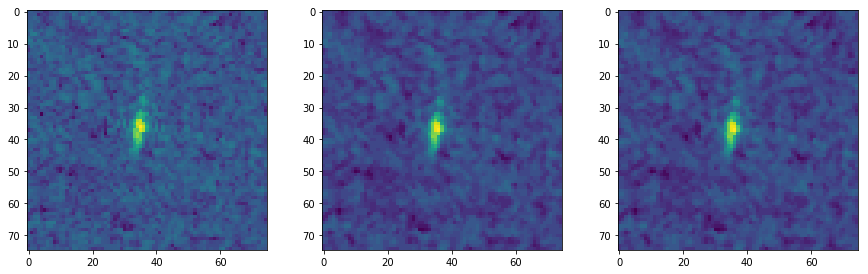

In [32]:
fig = plt.figure(1,figsize=(15,15))
ax = fig.add_subplot(3,3,1)
ax.imshow(orgimg)
ax = fig.add_subplot(3,3,2)
ax.imshow(newimg)
ax = fig.add_subplot(3,3,3)
ax.imshow(speckimg)
plt.show()

In [29]:
speckimg/newimg

array([[ 0.3504468,  0.3504468,  0.3504468, ...,  0.3504468,  0.3504468,
         0.3504468],
       [ 0.3504468,  0.3504468,  0.3504468, ...,  0.3504468,  0.3504468,
         0.3504468],
       [ 0.3504468,  0.3504468,  0.3504468, ...,  0.3504468,  0.3504468,
         0.3504468],
       ..., 
       [ 0.3504468,  0.3504468,  0.3504468, ...,  0.3504468,  0.3504468,
         0.3504468],
       [ 0.3504468,  0.3504468,  0.3504468, ...,  0.3504468,  0.3504468,
         0.3504468],
       [ 0.3504468,  0.3504468,  0.3504468, ...,  0.3504468,  0.3504468,
         0.3504468]])